### 1. 

En el archivo "logistic_regression_df_class" hemos visto un ejemplo multiclase. Realiza un análisis con regresión linear teniendo como target la columna "duración". Es decir, averigua cuánto aumenta o disminuye la duración cuando se aumenta una unidad los valores de las demás columnas.

- ¿Qué acierto tiene? (score)
- ¿Cuál es el RMSE? ¿Dirías que es un valor alto?
- Viendo la matriz de correlación, ¿tienen coherencia los resultados de la regresión?
- ¿Es la regresión un buen método para este dataset?

### 

El porcentaje de aciertos es muy bajo del 8.7% para todos los datos, 11.8% para la muestra de entrenamiento y 0.67% para la de test

El RMSE es alto (RMSE: 236.6280567166665) ya que como se mide con la misma métrica de la variable implica que hay un error de 236 minutos/segundos respecto al valor real. Probablemente halla algunos outliers. Mirando por encima los valores de la variable hay una importante dispersión entre ellos. Junto a valores de 12, 13 de duración hay otros de 101, 109 

Sí los datos son coherentes con los obtenidos en la matriz de correlación. La correlación de la duración con el resto de variables es muy baja. Se encuentra entre 0,091 hasta 0,28 

Realmente no tendría sentido realizar una regresión con valores tan bajos en la matriz de correlación. Si no hay asociación entre las variables la predicción de una de ellas a partir del resto no tiene sentido. 

In [6]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
#from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb

In [7]:
dataframe = pd.read_csv("../data/usuarios_win_mac_lin.csv")


In [8]:
X = dataframe[['paginas', 'acciones', 'valor', 'clase']]

In [9]:
y = dataframe['duracion']

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [11]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression(n_jobs=-1)  

## Entrenando el modelo

In [13]:
# Entrenando el modelo
lm.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

## Evaluación del modelo

In [14]:
# secante
lm.intercept_

2.812709860357856

In [15]:
# pendiente
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coeff_df


,Coefficient
paginas,56.749670
acciones,-1.432839
valor,-0.496296
clase,32.021790


## Predicción del modelo

In [16]:
lm.score(X_train, y_train) *100

11.822945926275086

In [17]:
lm.score(X_test, y_test) *100

0.6761052940610801

In [18]:
predictions = lm.predict(X_test)


## Calculando los errores

In [19]:
from sklearn import metrics

In [20]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 158.38316344920452
MSE: 55992.83722550593
RMSE: 236.6280567166665


## porcentaje de aciertos del modelo

In [21]:
lm.score(X, y) * 100  # Test

8.749468479299537

In [22]:
lm.score(X_train, y_train) * 100 #

11.822945926275086

In [23]:
lm.score(X_test, y_test) * 100  # Test

0.6761052940610801

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

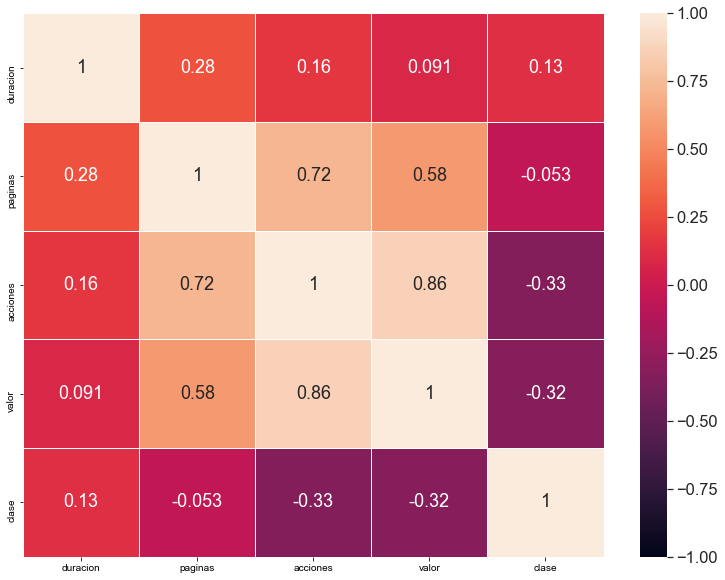

In [25]:
plt.subplots(figsize=(13, 10))
sns.set(font_scale=1.5)
sns.heatmap(dataframe.corr(),
           vmin = -1,
           vmax = 1,
            annot = True,
           linewidths = .5)

plt.show()